In [45]:
import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [46]:
data = pd.read_csv('./creditcard.csv')
df = pd.DataFrame(data)
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


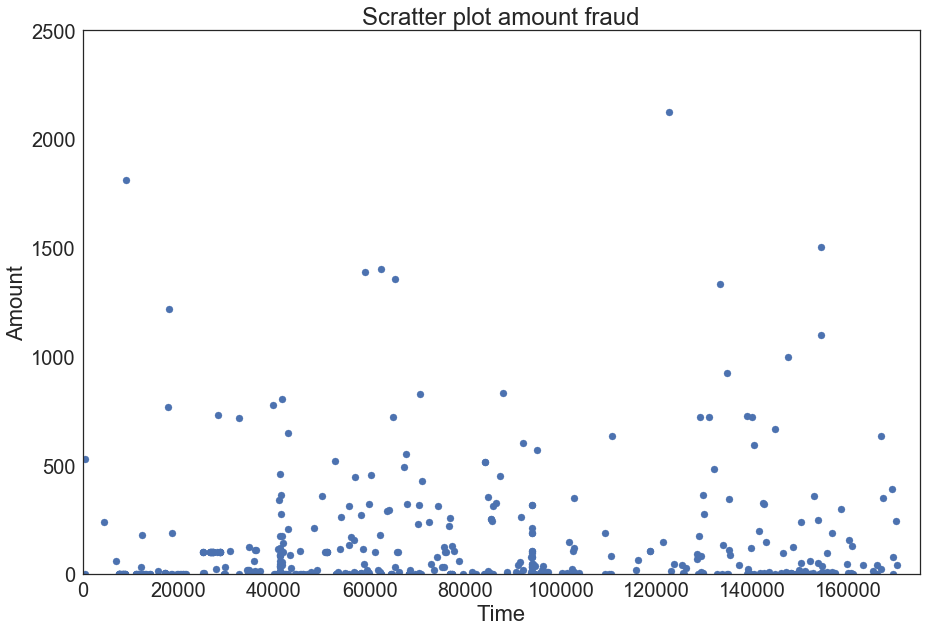

In [47]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [48]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [49]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


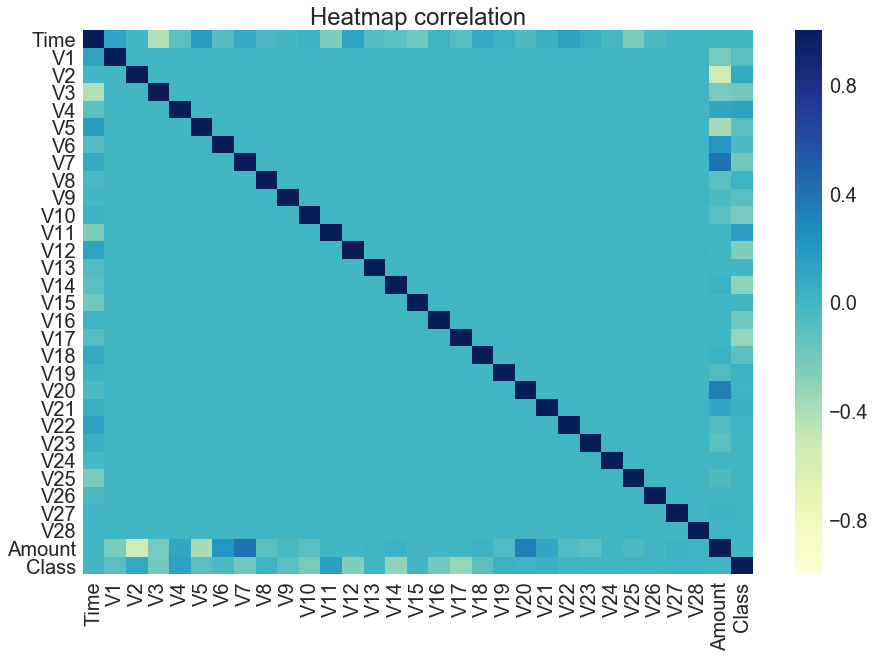

In [50]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [51]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

#df_rank

In [52]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:210000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

# df_sample=df_train_0.sample(300)
df_sample = df_train_1
df_train = df_train_0
for i in range(521):
    df_train = df_train.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 394 frauds so we need to take a similar number of non-fraud


In [53]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [54]:
faud = np.where(y_train==1)[0]
len(faud)
print(X_train.shape, y_train.shape)

(414880, 29) (414880,)


In [55]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[210000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [56]:
print(X_test_all.shape, y_test_all.shape)

(74807, 29) (74807,)


In [57]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [58]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model SVM using Gradient Descent

In [59]:
import numpy as np
import sys
# from scipy.sparse import csr_matrix, lil_matrix, save_npz, load_npz
from sklearn.metrics import classification_report, precision_recall_fscore_support, fbeta_score

In [60]:
def compute_loss(X, y, w, b):
    score = X.dot(w) + b  # shape (N,)
    y_score = y*score
    return (np.sum(np.maximum(0, 1 - y_score)) + .5*lamda*w.dot(w)) / X.shape[0]

def compute_gradient(X, y, w, b):
    score = X.dot(w) + b  # shape (N,)
    y_score = y*score  # element wise product, shape (N,)
    active_set = np.where(y_score <= 1)[0]  # consider 1 - yz >= 0 only
    temp = -X*y[:, np.newaxis]  # each row is y_n*x_n
    grad_w = (np.sum(temp[active_set], axis=0) + lamda*w) / X.shape[0]
    grad_b = (-np.sum(y[active_set])) / X.shape[0]
    return (grad_w, grad_b)

In [61]:
def softmarginSVM_gd(X, y, X_test_all, y_test_all, w0, b0, eta, gamma):
    w = [w0]
    v = [np.zeros_like(w0)]  # momentum w
    b = [b0]
    c = [np.zeros_like(b0)]  # momentum b
    # check_gradient(X, y, w, b)
    for it in range(1000):
#         (grad_w, grad_b) = compute_gradient(X, y, w[-1]-gamma*v[-1], b[-1]-gamma*c[-1])
        (grad_w, grad_b) = compute_gradient(X, y, w[-1], b[-1])
        w_new = w[-1] - 0.01*grad_w
        b_new = b[-1] - 0.01*grad_b
        w.append(w_new)
        b.append(b_new)
#         v_new = gamma*v[-1] + eta*grad_w
#         w_new = w[-1] - v_new
#         w.append(w_new)
#         v.append(v_new)
#         c_new = gamma*c[-1] + eta*grad_b
#         b_new = b[-1] - c_new
#         b.append(b_new)
#         c.append(c_new)
#         if (it % 100) == 0:
#             print('  iteration %d' % it + ' loss: %f' % compute_loss(X, y, w[-1], b[-1]))
#             model = (w[-1], b[-1])
#             predict(model, X_test_all, y_test_all, 0.5)
    return (w[-1], b[-1])

In [62]:
def learn_model(X_train, y_train, X_test_all, y_test_all, minibatch_size, num_epochs, eta, gamma):
    num_samples = X_train.shape[0]
    num_features = X_train.shape[1]

    y_train = 2*y_train-1  # convert labels to 1, -1 using for training

    w_init = .1 * np.random.randn(num_features)
    b_init = .1 * np.random.randn()
    w_hinge = [w_init]
    b_hinge = [b_init]
#     (w_model, b_model) = softmarginSVM_gd(X_train, y_train, X_test_all, y_test_all, w_init, b_init, eta, gamma)

    num_minibatch = int(np.ceil(num_samples / float(minibatch_size)))

    for epoch in range(num_epochs):
        print('Epoch ', epoch)
        mix_ids = np.random.permutation(num_samples)
        for it in range(num_minibatch):
            print('Minibatch ', it)
            ids = mix_ids[minibatch_size*it:min(minibatch_size*(it+1), num_samples)]
            X_batch = X_train[ids]
            y_batch = y_train[ids]
            (w_new, b_new) = softmarginSVM_gd(X_batch, y_batch, X_test_all, y_test_all, w_hinge[-1], b_hinge[-1], eta, gamma)
            print('---Loss: %f' % compute_loss(X_batch, y_batch, w_new, b_new))
            w_hinge.append(w_new)
            b_hinge.append(b_new)
        model = (w_hinge[-1], b_hinge[-1])
#         thresh = find_boundary(model, X_train, y_train)
#         print('Thresh: ', thresh)
        print('Predicted result after epoch: ', epoch)
        predict(model, X_test_all, y_test_all, 0.5)

In [63]:
def find_boundary(model, X_train, y_train):
    w, b = model
    temp = X_train.dot(w) + b
    temp = temp.flatten()
    prob = 1 / (1 + np.exp(-temp))

    id_c0 = np.where(y_train == -1)[0]  #inactive
    id_c1 = np.where(y_train == 1)[0]  #active
    hist_c0, bins = np.histogram(prob[id_c0], bins=np.arange(0, 1.01, 0.01))
    hist_c1, bins = np.histogram(prob[id_c1], bins=np.arange(0, 1.01, 0.01))

    # print(hist_c0)
    # print(hist_c1)

    min_bin = (hist_c1>0).argmax()
    max_bin = len(hist_c0) - 1 - (hist_c0>0)[::-1].argmax()
    thresh = 0
    mis_classify = 1e9
    if min_bin < max_bin:
        for i in range(min_bin, max_bin):
            value = sum(hist_c0[i:]) + sum(hist_c1[:(i+1)])
            if value < mis_classify:
                mis_classify = value
                thresh = i
    else:
        thresh = int((min_bin + max_bin)/2)
#     print('min_bin: %d, max_bin: %d, mis_classify: %d' %(min_bin, max_bin, mis_classify))
    thresh = (bins[thresh] + bins[thresh+1])/2
    return thresh

In [64]:
def predict(model, X_test_all, y_test_all, thresh):
    w_final, b_final = model[0], model[1]
    temp = X_test_all.dot(w_final) + b_final
#     prob = 1/(1+np.exp(-temp))
    pred_labels = np.where(temp >= 0, 1, 0)
    print(classification_report(y_test_all, pred_labels, target_names=['non-fraud', 'fraud']))
    cm = confusion_matrix(y_test_all, pred_labels)
#     plot_confusion_matrix(cm,class_names)
    print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))
    print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
    print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
    print("The accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
    print('--------------')

In [65]:
C = 1
lamda = 1./C
learn_model(X_train, y_train, X_test_all, y_test_all, minibatch_size=10000, num_epochs=20, eta=0.09, gamma=0.1)

Epoch  0
Minibatch  0
---Loss: 1.188649
Minibatch  1
---Loss: 0.388295
Minibatch  2
---Loss: 1.453411
Minibatch  3
---Loss: 0.447025
Minibatch  4
---Loss: 2.964677
Minibatch  5
---Loss: 6.560273
Minibatch  6
---Loss: 7.316707
Minibatch  7
---Loss: 6.999843
Minibatch  8
---Loss: 0.506525
Minibatch  9
---Loss: 1.064979
Minibatch  10
---Loss: 7.443520
Minibatch  11
---Loss: 0.353261
Minibatch  12
---Loss: 4.465251
Minibatch  13
---Loss: 4.206205
Minibatch  14
---Loss: 3.974477
Minibatch  15
---Loss: 1.555066
Minibatch  16
---Loss: 5.999532
Minibatch  17
---Loss: 6.666907
Minibatch  18
---Loss: 1.276712
Minibatch  19
---Loss: 6.285012
Minibatch  20
---Loss: 0.730253
Minibatch  21
---Loss: 3.675317
Minibatch  22
---Loss: 5.466123
Minibatch  23
---Loss: 0.521914
Minibatch  24
---Loss: 4.100992
Minibatch  25
---Loss: 4.236717
Minibatch  26
---Loss: 0.790000
Minibatch  27
---Loss: 2.664912
Minibatch  28
---Loss: 4.781883
Minibatch  29
---Loss: 0.775497
Minibatch  30
---Loss: 1.258480
Minibatch

KeyboardInterrupt: 